In [5]:
# Transformations 2D
## Exercice 10

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, sqrt
from matplotlib.patches import Rectangle
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython.display import display

limits = [
    [0, 22],
    [0, 20]
]

npa = np.array

def translation(vect: npa([[float], [float]])) -> npa([[float], [float], [float]]):
    """
    Vectorial translation of coordinates (x, y)

    Args:
        vect (np.array([float, float])): Vector to translate
    
    Returns:
        np.array([[float], [float], [float]]: Transformation matrix

    """
    x = vect[0][0]
    y = vect[1][0]
    
    return npa([
        [1, 0, x],
        [0, 1, y],
        [0, 0, 1]
    ])

def rotation_origin(alpha: float) -> npa([[float], [float], [float]]):
    """
    Rotation by angle $\alpha$ around the origin.
        !!! CAUTION, it's a rotation at the origin, not around an arbitrary point !!!
    
    Args:
        alpha: Rotation angle in degrees
    
    Returns:
        np.array([[float], [float], [float]]: Transformation matrix

    """
    rad = np.radians(alpha) # Conversion degrés -> radians car sin et cos prennent des radians en paramètres
    
    return npa([
        [cos(rad), -sin(rad), 0],
        [sin(rad), cos(rad),  0],
        [0,          0,           1]
    ])


def scaling(vect: npa([[float], [float]])) -> npa([[float], [float]]):
    """
    Vector scaling of coordinates (x, y)

    Args:
        vect: Scaling vector
    
    Returns:
        np.array([[float], [float], [float]]: Transformation matrix

    """
    x = vect[0][0]
    y = vect[1][0]
    
    return npa([
        [x, 0, 0],
        [0, y, 0],
        [0, 0, 1]
    ])

def translation_to_origin(
        point: npa([[float], [float]])
) -> npa([[float], [float], [float]]):
    """
    Translation d'un point vers l'origine
    
    Args:
        point: Point à translater 

    Returns:
        np.array([[float], [float], [float]]: Matrice de transformation
    """
    return translation(-point)

def coord2D_to_homogeneous_coods(coords: npa([[float], [float]])) -> npa([[float], [float], [float]]):
    """
    Convertit des coordonnées 2D en coordonnées homogènes
    
    Args:
        coords: Coordonnées 2D 

    Returns:
        np.array([[float], [float], [float]]: Coordonnées homogènes
    """
    return npa([
        [coords[0][0]],
        [coords[1][0]],
        [1]
    ])

def plot_rectangle(
    points: list(npa([[float], [float]])),
    fillColor: str = 'none',
    edgeColor: str = 'black',
    lineWidth: float = 1,
    lineStyle: str = '-',
    text: str = None,
    textColor: str = 'black',
    axis: plt.Axes = None
) -> None:
    """
    Plot a rectangle from 4 points.
    
    Args:
        points: List of the 4 points of the rectangle
        fillColor: Fill color
        edgeColor: Edge color
        lineWidth: Line thickness
        lineStyle: Line style
        text: Text to display within the rectangle
        textColor: Text color
        axis: Axis on which to plot the rectangle
    
    Returns:
        None
    """
    # Calculate the angle (degrees) of the vector (point[0], point[1]) with the horizontal axis
    angle = np.degrees(
        np.arctan2(
            points[1][1][0] - points[0][1][0],
            points[1][0][0] - points[0][0][0]
        )
    )
    
    # Calculate the length of the vector (point[0], point[1])
    length = abs(sqrt(
        (points[1][0][0] - points[0][0][0])**2 +
        (points[1][1][0] - points[0][1][0])**2
    ))
    
    # Calculate the width of the vector (point[1], point[2])
    width = abs(sqrt(
        (points[2][0][0] - points[1][0][0])**2 +
        (points[2][1][0] - points[1][1][0])**2
    ))
    
    _plot = plt.gca() if axis is None else axis
    
    # Plot the rectangle
    (_plot
        .add_patch(
            Rectangle(
                xy=(points[0][0][0], points[0][1][0]),
                width=length,
                height=width,
                angle=angle,
                rotation_point="xy",
                linewidth=lineWidth,
                linestyle=lineStyle,
                edgecolor=edgeColor,
                facecolor=fillColor,
                zorder=2.75
            )
        )
    )
    
    # Plot the text
    if text:
        _plot.text(
            (points[0][0][0] + points[2][0][0]) / 2,
            (points[1][1][0] + points[3][1][0]) / 2,
            text,
            horizontalalignment='center',
            verticalalignment='center',
            color=textColor,
            fontsize='medium'
        )

    
def set_settings(
    _limits: list[list[float]],
    axis: plt.Axes = None
) -> None:
    """
    Set the settings of the graph
    
    Args:
        _limits: Limits of the graph
        axis: Axis on which to set the settings
    
    Returns:
        None
    """
    if axis:
        axis.set_xlim(_limits[0][0], _limits[0][1])
        axis.set_ylim(0, _limits[1][1])
        
        axis.set_xticks(np.arange(_limits[0][0], _limits[0][1], 1))
        axis.set_yticks(np.arange(_limits[1][0], _limits[1][1], 1))
        
        axis.grid(color='gray', linestyle='-', linewidth=.5)
        
        axis.set_aspect('equal', adjustable='box')
        axis.set_axisbelow(True)
        
    # Set the limits of the graph
    plt.xlim(_limits[0][0], _limits[0][1])
    plt.ylim(0, _limits[1][1])
    
    # Set the ticks of the graph
    plt.xticks(np.arange(_limits[0][0], _limits[0][1], 1))
    plt.yticks(np.arange(_limits[1][0], _limits[1][1], 1))
    
    # Set the grid of the graph
    plt.grid(color='gray', linestyle='-', linewidth=.5)
    
    # X and Y axis are in black
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    
    # The graph is orthonormal
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_axisbelow(True)

## Initializing Start and Finish Squares

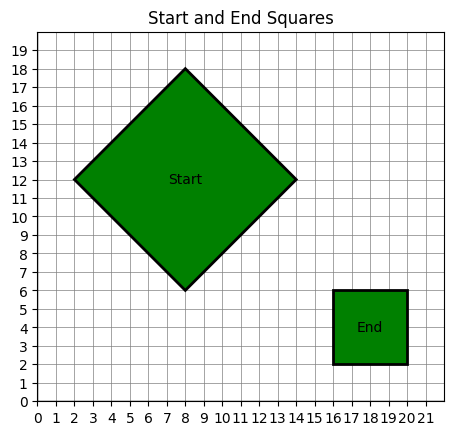

In [ ]:
set_settings(limits)

start_square = [
    npa([[8], [6]]),
    npa([[14], [12]]),
    npa([[8], [18]]),
    npa([[2], [12]]),
]

end_square = [
    npa([[16], [2]]),
    npa([[20], [2]]),
    npa([[20], [6]]),
    npa([[16], [6]]),
]

    
rectangleOptions = {
    'fillColor': "green",
    'lineWidth': 2,
    'textColor': "black"
}
    
# Plot the rectangles
plot_rectangle(
    start_square,
    text="Start",
    **rectangleOptions
)

plot_rectangle(
    end_square,
    text="End",
    **rectangleOptions
)

plt.title("Start and End Squares")
plt.show()

## Step 1: Translation of the starting square to the origin
In order to perform the rotation, one must have a point on the origin.

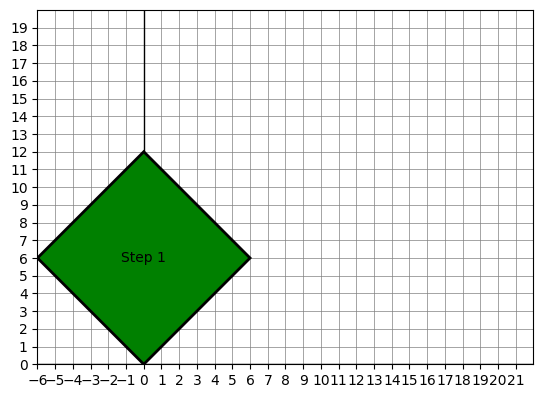

In [ ]:
# Apply the translation to all points of the starting square
step_1_square = [
    translation_to_origin(start_square[0]) @ coord2D_to_homogeneous_coods(point)
    
    for point in start_square
]

# Plot the rectangle
plot_rectangle(
    step_1_square,
    text="Step 1",
    **rectangleOptions
)

limits[0][0] = -6
set_settings(limits)

plt.show()

## Step 2: Rotate the starting square 45° around the origin
We do an hourly rotation so the degrees are negative.
The angle is trivially determined with what we see on the graph and the coordinates.

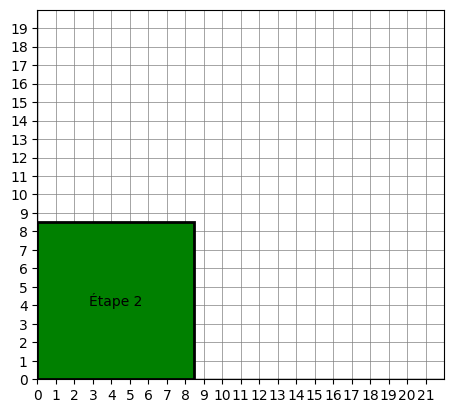

In [ ]:
# Apply the rotation to all points of the starting square
step_2_square = [
    rotation_origin(-45) @ point
    
    for point in step_1_square
]

# Plot the rectangle
plot_rectangle(
    step_2_square,
    text="Étape 2",
    **rectangleOptions
)

limits[0][0] = 0
set_settings(limits)

plt.show()

## Step 3: Homotety of the starting factor square to be determined

The starting square at for diagonal 12, so its length is $12 / \sqrt{2} = 6\sqrt{2}$
The square of arrival to for side 4, so the homotety factor is $4 / (6\sqrt{2}) = \frac{2}{3\sqrt{2}}$

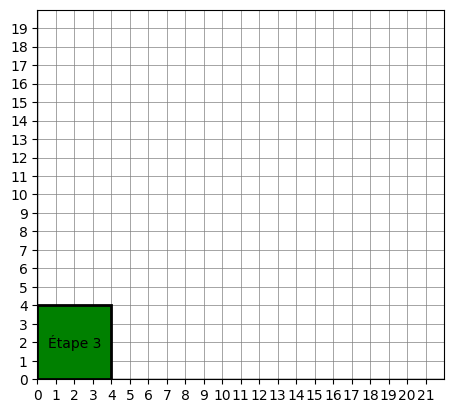

In [ ]:
scaling_factor = 2 / (3 * sqrt(2))

# Apply the scaling to all points of the starting square
step_3_square = [
    scaling(npa([[scaling_factor], [scaling_factor]])) @ point
    
    for point in step_2_square
]

# Plot the rectangle
plot_rectangle(
    step_3_square,
    text="Étape 3",
    **rectangleOptions
)

set_settings(limits)
plt.show()

## Step 4 (last): Translation of the starting square to the finish square.
The translation vector is the $\overrightarrow{AA'}$ vector where $A$ is the bottom left point of the starting square and $A'$ the bottom left point of the ending square.

NB: $\overrightarrow{AA'}$ = $\overrightarrow{OA'}$

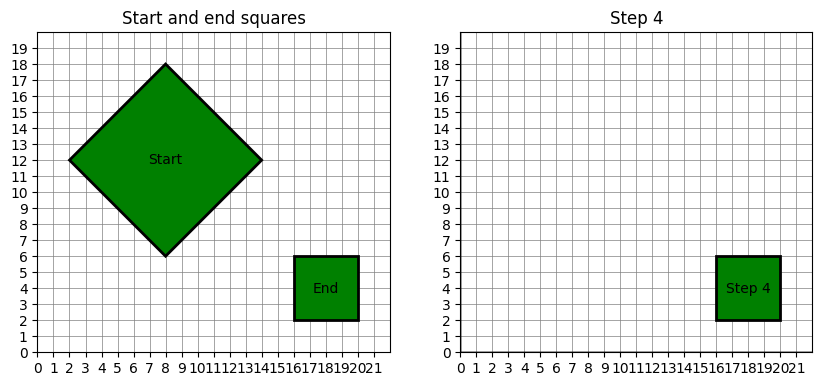

In [11]:
translation_vector = end_square[0]

step_4_square = [
    translation(translation_vector) @ point
    
    for point in step_3_square
]

# The final plot is composed of 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# start_square plot
plot_rectangle(
    start_square,
    text="Start",
    **rectangleOptions,
    axis=ax1
)

# end_square plot on the first subplot
plot_rectangle(
    end_square,
    text="End",
    **rectangleOptions,
    axis=ax1
)

# step_4_square plot on the second subplot
plot_rectangle(
    step_4_square,
    text="Step 4",
    **rectangleOptions,
    axis=ax2
)

set_settings(limits, ax1)
set_settings(limits, ax2)

ax1.set_title("Start and end squares")
ax2.set_title("Step 4")

plt.show();

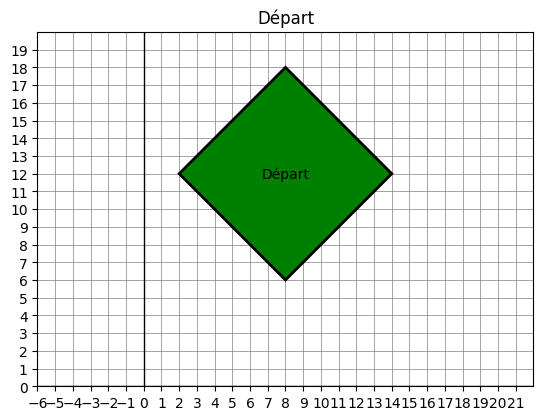

In [12]:
steps = [
    start_square,
    step_1_square,
    step_2_square,
    step_3_square,
    step_4_square
]

legends = [
    "Start",
    "Step 1",
    "Step 2",
    "Step 3",
    "End"
]

titles = [
    "Start",
    "Step 1 : Translation to the origin",
    "Step 2 : Rotation of 45° around the origin",
    "Step 3 : Scaling of 2 / (3 * sqrt(2)) factor",
    "Step 4 : Translation to the end square"
]

def update(frame: int):
    """
    Animation update function

    Args:
        frame: Frame number

    Returns:
        None
    """
    # Clear the graph
    plt.clf()
    
    # Set the settings of the graph
    limits[0][0] = -6
    set_settings(limits)
    
    plt.title(titles[frame])
    
    # Plot the new rectangle
    plot_rectangle(
        steps[frame],
        text=legends[frame],
        **rectangleOptions
    )
    
anim = FuncAnimation(
    plt.gcf(),
    update,
    frames=range(len(steps)),
    interval=1000,
    repeat=False
)

display(HTML(anim.to_jshtml()))